In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
import requests

d = pd.Series(np.random.randn(4), name = 'daily returns')
mul = d * 100
print(mul)
print(d.abs())
d.describe()

0    -0.428643
1    29.383949
2    46.236661
3   -17.785578
Name: daily returns, dtype: float64
0    0.004286
1    0.293839
2    0.462367
3    0.177856
Name: daily returns, dtype: float64


count    4.000000
mean     0.143516
std      0.288322
min     -0.177856
25%     -0.047679
50%      0.144777
75%      0.335971
max      0.462367
Name: daily returns, dtype: float64

In [37]:
d.index = ['google', 'facebook', 'twitter', 'amazon']
print(d)
print(d['amazon'])
d['google'] = 0
print(d)
'facebook' in d


google     -0.070037
facebook    0.530869
twitter    -0.454413
amazon      0.914750
Name: daily returns, dtype: float64
0.9147503858783038
google      0.000000
facebook    0.530869
twitter    -0.454413
amazon      0.914750
Name: daily returns, dtype: float64


True

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [22]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
A,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
B,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
C,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
D,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
E,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
F,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
G,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
H,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [39]:
#select a row we used python indices
df[2:6]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546


In [40]:
#select a column by passing the column name as an array like ['country', 'cc']
df[['country', 'cc']]

,country,cc
0,Argentina,75.716805
1,Australia,67.759026
2,India,64.575551
3,Israel,64.436451
4,Malawi,74.707624
5,South Africa,72.718710
6,United States,72.347054
7,Uruguay,78.978740


In [41]:
# To select both row and column we use iloc
df.iloc[0:3, 3:]

,POP,XRAT,tcgdp,cc,cg
0,37335.653,0.99950,2.950722e+05,75.716805,5.578804
1,19053.186,1.72483,5.418047e+05,67.759026,6.720098
2,1006300.297,44.94160,1.728144e+06,64.575551,14.072206


In [42]:
#To select rows and columns using a mixture of integers and labels, the loc attribute can be used in a
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [43]:
df[df.POP >= 20000]


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


In [44]:
df.query("country in ['Argentina', 'India', 'South Africa'] and POP > 40000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546


In [45]:
df[df.cc == max(df.cc)]
df[df.POP == min(df.POP)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.97874,5.108068


In [46]:
df.loc[(df.cc + df.cg < 100) & (df.year == 2000) ,['country isocode', 'year','POP','XRAT']]

,country isocode,year,POP,XRAT
0,ARG,2000,37335.653,0.999500
1,AUS,2000,19053.186,1.724830
2,IND,2000,1006300.297,44.941600
3,ISR,2000,6114.570,4.077330
4,MWI,2000,11801.505,59.543808
5,ZAF,2000,45064.098,6.939830
6,USA,2000,282171.957,1.000000
7,URY,2000,3219.793,12.099592


In [47]:
df.loc[df.index[:2], ['country', 'year', 'POP']]

,country,year,POP
0,Argentina,2000,37335.653
1,Australia,2000,19053.186


In [48]:
df_subset = df[['country', 'POP', 'tcgdp']]
df_subset

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [49]:
df_subset.to_csv('pwt_df.csv', index = False)

In [50]:
df[['year', 'POP', 'XRAT', 'tcgdp', 'cc', 'cg']].apply(max)

year     2.000000e+03
POP      1.006300e+06
XRAT     5.954381e+01
tcgdp    9.898700e+06
cc       7.897874e+01
cg       1.407221e+01
dtype: float64

In [51]:
df.apply(lambda row: row, axis=1)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [52]:
complexCondition = df.apply(
    lambda row: row.POP > 40000 if row.country in ['Argentina', 'India', 'South Africa'] else row.POP < 20000,
    axis=1), ['country', 'year', 'POP', 'XRAT', 'tcgdp']
df.loc[complexCondition]

,country,year,POP,XRAT,tcgdp
1,Australia,2000,19053.186,1.724830,5.418047e+05
2,India,2000,1006300.297,44.941600,1.728144e+06
3,Israel,2000,6114.570,4.077330,1.292539e+05
4,Malawi,2000,11801.505,59.543808,5.026222e+03
5,South Africa,2000,45064.098,6.939830,2.272424e+05
7,Uruguay,2000,3219.793,12.099592,2.525596e+04


In [53]:
df.query("POP >= 2000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [54]:
df.query("country in ['Argentina', 'Australia', 'india', 'Israel'] and POP >= 1000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,295072.21869,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.72483,541804.65210,67.759026,6.720098
3,Israel,ISR,2000,6114.570,4.07733,129253.89423,64.436451,10.266688


In [55]:
df.loc[(df.cg + df.cc <= 100) & (df.POP >= 10000), ['year', 'cc', 'cg', 'XRAT']]

,year,cc,cg,XRAT
0,2000,75.716805,5.578804,0.999500
1,2000,67.759026,6.720098,1.724830
2,2000,64.575551,14.072206,44.941600
4,2000,74.707624,11.658954,59.543808
5,2000,72.718710,5.726546,6.939830
6,2000,72.347054,6.032454,1.000000


In [56]:
result = df.apply(lambda row: row.cc >= 60 if row.country in ['Argentina', 'Australia','India'] else row.POP < 3000, axis=1), ['country','year', 'cc', 'cg', 'XRAT']
df.loc[result]

,country,year,cc,cg,XRAT
0,Argentina,2000,75.716805,5.578804,0.99950
1,Australia,2000,67.759026,6.720098,1.72483
2,India,2000,64.575551,14.072206,44.94160


In [57]:
df.where(df.POP > 20000, False)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.9995,295072.21869,75.716805,5.578804
1,False,False,False,False,False,False,False,False
2,India,IND,2000,1006300.297,44.9416,1728144.3748,64.575551,14.072206
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,South Africa,ZAF,2000,45064.098,6.93983,227242.36949,72.71871,5.726546
6,United States,USA,2000,282171.957,1.0,9898700.0,72.347054,6.032454
7,False,False,False,False,False,False,False,False


In [58]:
df.loc[df.cg == max(df.cg), 'cg'] = np.nan
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [59]:
def update_row(row):
    row.POP = np.nan if row.POP <= 10000 else row.POP

    row.XRAT = row.XRAT / 10
    return row
df.apply(update_row, axis=1)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.099950,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,0.172483,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,4.494160,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000,NaN,0.407733,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,5.954381,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,0.693983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,0.100000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,NaN,1.209959,2.525596e+04,78.978740,5.108068


In [61]:
df.applymap(lambda x: round(x, 1) if type(x) != str else x)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.7,1.0,295072.2,75.7,5.6
1,Australia,AUS,2000,19053.2,1.7,541804.7,67.8,6.7
2,India,IND,2000,1006300.3,44.9,1728144.4,64.6,NaN
3,Israel,ISR,2000,6114.6,4.1,129253.9,64.4,10.3
4,Malawi,MWI,2000,11801.5,59.5,5026.2,74.7,11.7
5,South Africa,ZAF,2000,45064.1,6.9,227242.4,72.7,5.7
6,United States,USA,2000,282172.0,1.0,9898700.0,72.3,6.0
7,Uruguay,URY,2000,3219.8,12.1,25256.0,79.0,5.1


In [67]:
for idx in list(zip([0, 3, 5, 6], [3, 4, 6, 2])):
    df.iloc[idx] = np.nan
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,NaN,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1006300.297,44.941600,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000.0,6114.570,NaN,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,45064.098,6.939830,2.272424e+05,NaN,5.726546
6,United States,USA,NaN,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [75]:
def replace_nan(x):
    if type(x) != str:
        return  round(0, 1) if np.isnan(x) else round(x, 1)
    else:
        return 0 if x == '' else x
df.applymap(replace_nan)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,0.0,1.0,295072.2,75.7,5.6
1,Australia,AUS,2000.0,19053.2,1.7,541804.7,67.8,6.7
2,India,IND,2000.0,1006300.3,44.9,1728144.4,64.6,0.0
3,Israel,ISR,2000.0,6114.6,0.0,129253.9,64.4,10.3
4,Malawi,MWI,2000.0,11801.5,59.5,5026.2,74.7,11.7
5,South Africa,ZAF,2000.0,45064.1,6.9,227242.4,0.0,5.7
6,United States,USA,0.0,282172.0,1.0,9898700.0,72.3,6.0
7,Uruguay,URY,2000.0,3219.8,12.1,25256.0,79.0,5.1


In [85]:
df.fillna(df.iloc[:, 2:8].mean())
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,NaN,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1006300.297,44.941600,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000.0,6114.570,NaN,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,45064.098,6.939830,2.272424e+05,NaN,5.726546
6,United States,USA,NaN,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [86]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,NaN,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [87]:
df.set_index('country')

,POP,tcgdp
country,,
Argentina,NaN,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [90]:
df.columns = 'country','population', 'total GDP'
df

,country,population,total GDP
0,Argentina,NaN,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [93]:
df['population'] = df['population'] * 1e3
df

C:\Users\Rabo Yusuf\AppData\Local\Temp\ipykernel_16560\1406620980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['population'] = df['population'] * 1e3


,country,population,total GDP
0,Argentina,NaN,2.950722e+05
1,Australia,1.905319e+13,5.418047e+05
2,India,1.006300e+15,1.728144e+06
3,Israel,6.114570e+12,1.292539e+05
4,Malawi,1.180150e+13,5.026222e+03
5,South Africa,4.506410e+13,2.272424e+05
6,United States,2.821720e+14,9.898700e+06
7,Uruguay,3.219793e+12,2.525596e+04


In [94]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

C:\Users\Rabo Yusuf\AppData\Local\Temp\ipykernel_16560\823642587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GDP percap'] = df['total GDP'] * 1e6 / df['population']


,country,population,total GDP,GDP percap
0,Argentina,NaN,2.950722e+05,NaN
1,Australia,1.905319e+13,5.418047e+05,0.028436
2,India,1.006300e+15,1.728144e+06,0.001717
3,Israel,6.114570e+12,1.292539e+05,0.021139
4,Malawi,1.180150e+13,5.026222e+03,0.000426
5,South Africa,4.506410e+13,2.272424e+05,0.005043
6,United States,2.821720e+14,9.898700e+06,0.035080
7,Uruguay,3.219793e+12,2.525596e+04,0.007844


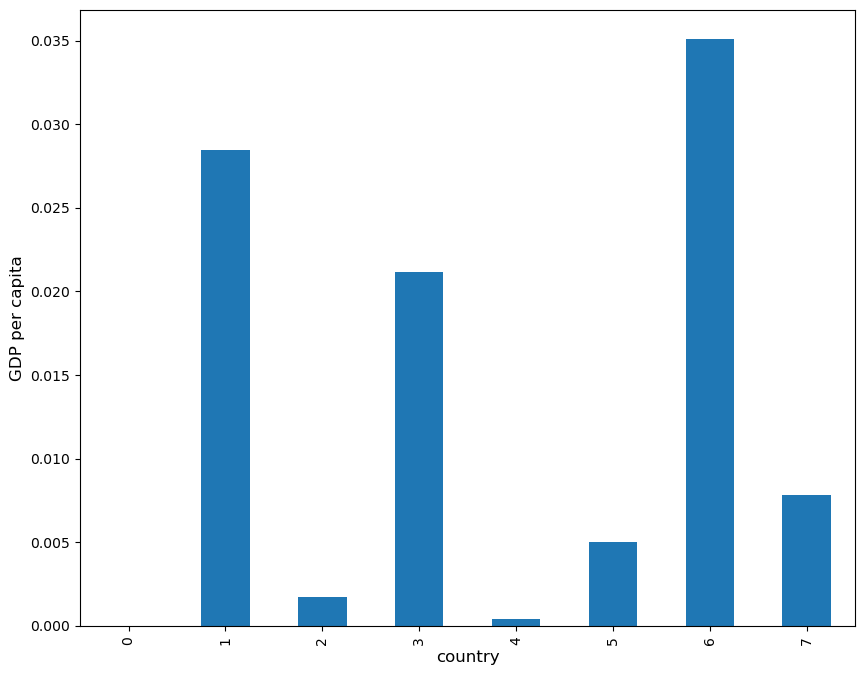

In [95]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [96]:
df.sort_values(by='GDP percap', ascending=False)

,country,population,total GDP,GDP percap
6,United States,2.821720e+14,9.898700e+06,0.035080
1,Australia,1.905319e+13,5.418047e+05,0.028436
3,Israel,6.114570e+12,1.292539e+05,0.021139
7,Uruguay,3.219793e+12,2.525596e+04,0.007844
5,South Africa,4.506410e+13,2.272424e+05,0.005043
2,India,1.006300e+15,1.728144e+06,0.001717
4,Malawi,1.180150e+13,5.026222e+03,0.000426
0,Argentina,NaN,2.950722e+05,NaN


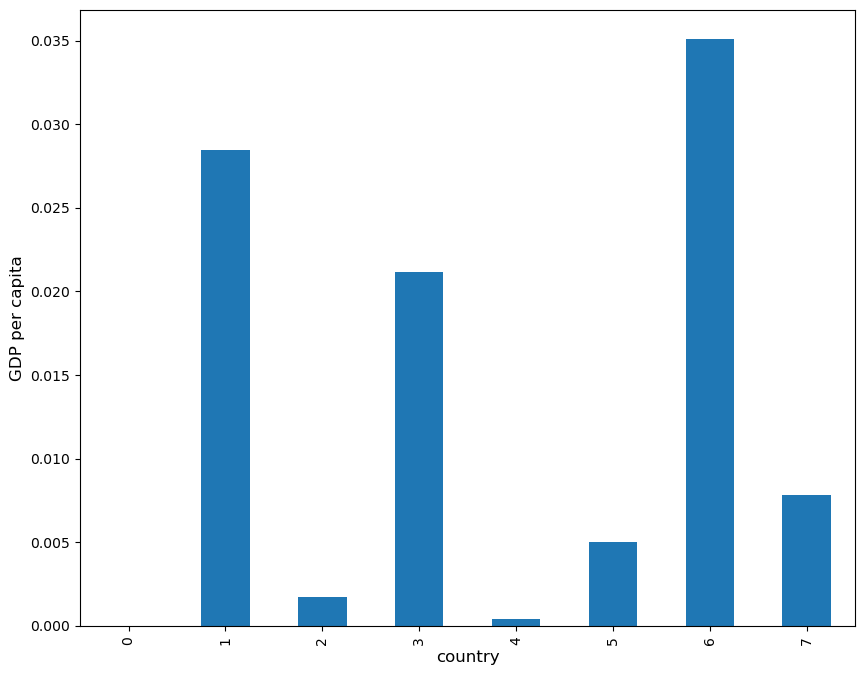

In [98]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [99]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [100]:
source[1]

'1948-01-01,3.4\r'

In [101]:
source[2]

'1948-02-01,3.8\r'

In [102]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [103]:
type(data)

pandas.core.frame.DataFrame

In [104]:
data.head()  # A useful method to get a quick look at a data frame

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [105]:
pd.set_option('display.precision', 1)
data.describe()  # Your output might differ slightly

,VALUE
count,912.0
mean,5.7
std,1.7
min,2.5
25%,4.4
50%,5.5
75%,6.7
max,14.9


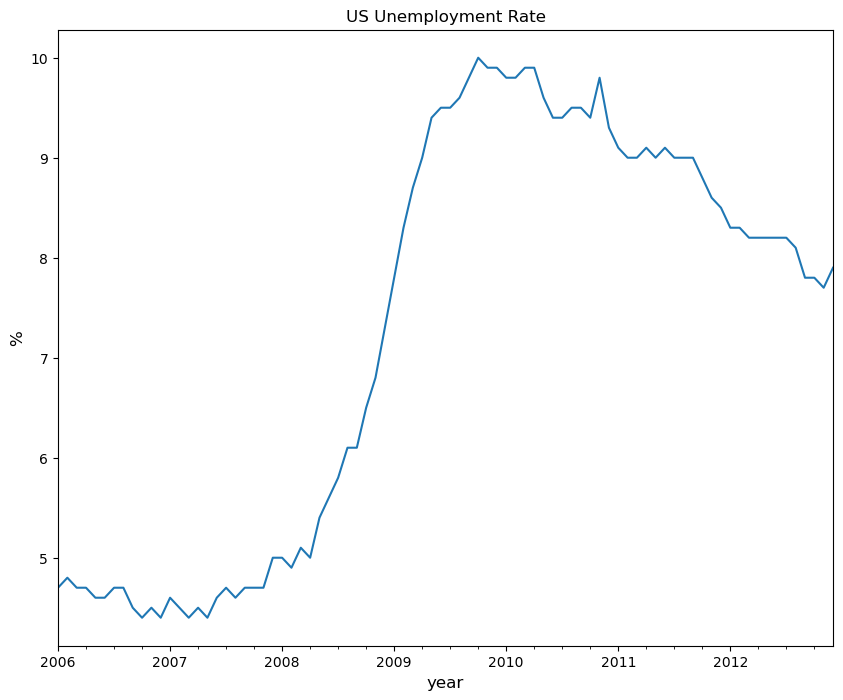

In [106]:
ax = data['2006':'2012'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [6]:
coins = pd.Series([.01,.05,.10,.25],index=['penny','nickel','dime','quarter'])
coins

penny      0.01
nickel     0.05
dime       0.10
quarter    0.25
dtype: float64

In [7]:
coin_dict = coins.to_dict()
coin_dict

{'penny': 0.01, 'nickel': 0.05, 'dime': 0.1, 'quarter': 0.25}

In [10]:
coinlabels = ['penny','nickel','dime','quarter','SBAnthony']
coins3 = pd.Series(coin_dict,index=coinlabels)
coins3
print(pd.isnull(coins3['penny']))

False
